In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=8000) #前8000个单词(每局评论至多包含8000个单词)

In [3]:
print('shape of train data is ',train_data.shape)
print('shape of train labels is ',train_labels.shape)
print('an example of train data is ',train_data[5])

shape of train data is  (25000,)
shape of train labels is  (25000,)
an example of train data is  [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


In [4]:
print(train_data[0:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 436

In [5]:
import numpy as np
# 神经网络的输入必须是tensor而不是list，所以需要将数据集处理为25000*8000
def vectorize_sequences(sequences,dimension=8000):
    # 生成25000*8000的二维Numpy数组
    results = np.zeros((len(sequences),dimension))
    # one-hot编码
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
print(x_train[0:5])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(x_train[0:5])
print(y_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 1. 1. ... 0. 0. 0.]


In [9]:
print(x_train.shape)
print(y_train.shape)

(25000, 8000)
(25000,)


In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## SVC模型

In [10]:
print("Trainig My SVM ...!!!")
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
#Create a svm Classifier
#classifier = SVC(kernel='linear', decision_function_shape='ovo') # Linear Kernel
classifier = SVC(kernel='linear')

#Train the model using the training sets
classifier.fit(partial_x_train, partial_y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_val)

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Trainig My SVM ...!!!


## CNN模型

In [22]:
def SeqCNN():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(8000,1)),
        tf.keras.layers.Conv1D(filters=128, kernel_size=50, strides=3, padding='same',activation='relu'),
        # 标准化
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool1D(pool_size=2, strides=3),
        tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
        tf.keras.layers.Conv1D(filters=32, kernel_size=10, strides=1, padding='same', activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=2, padding='same', activation='relu'),
        tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
        tf.keras.layers.Conv1D(filters=512, kernel_size=5, strides=1, padding='same', activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])


In [24]:
X_train = partial_x_train.reshape(-1,8000,1)
print(X_train.shape)
X_test = x_val.reshape(-1,8000,1)
model1 = SeqCNN()
optimizer = SGD(learning_rate=0.001, momentum=0.5)
model1.compile(optimizer=optimizer,
                loss='binary_crossentropy', metrics=['accuracy']
                # metrics: 列表，包含评估模型在训练和测试时的性能的指标，典型用法是metrics=[‘accuracy’]。
                )
model1.summary()

# 训练与验证
history = model1.fit(X_train, partial_y_train, epochs=5, batch_size=64,
                    validation_data=(X_test, y_val))  # validation_split 训练集所占比例
# 预测
print("正在评估模型:")
Y_pred = model1.predict(X_test)
print('res\n', Y_pred)

(15000, 8000, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 2667, 128)         6528      
                                                                 
 batch_normalization_12 (Bat  (None, 2667, 128)        512       
 chNormalization)                                                
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 889, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_37 (Conv1D)          (None, 889, 32)           28704     
                                                                 
 batch_normalization_13 (Bat  (None, 889, 32)          128       
 chNormalization)                                                
                                     

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16,activation='relu',input_shape=(8000,)))
    model.add(layers.Dense(16,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',# 还可以通过optimizer = optimizers.RMSprop(lr=0.001)来为优化器指定参数
                  loss='binary_crossentropy', # 等价于loss = losses.binary_crossentropy
                  metrics=['accuracy']) # 等价于metrics = [metircs.binary_accuracy]
    return model
model2 = build_model()

In [12]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, # 在全数据集上迭代20次
                    batch_size=512, # 每个batch的大小为512
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5313 - accuracy: 0.7862 - val_loss: 0.4042 - val_accuracy: 0.8610
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3356 - accuracy: 0.8861 - val_loss: 0.3321 - val_accuracy: 0.8678
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2562 - accuracy: 0.9115 - val_loss: 0.2871 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2127 - accuracy: 0.9254 - val_loss: 0.2836 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1777 - accuracy: 0.9389 - val_loss: 0.2798 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1552 - accuracy: 0.9482 - val_loss: 0.2844 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1341 - accuracy: 0.9562 - val_loss: 0.3224 - val_accuracy: 0.8768
Epoch 8/20
30/30

In [ ]:
model2.save('mymodel.h5')

In [15]:
#加载模型
my_model=models.load_model('mymodel.h5')
pred=my_model.predict(x_val)
pred

313/313 [==============================] - 0s 642us/step


array([[9.999838e-01],
       [1.614177e-04],
       [7.725745e-06],
       ...,
       [9.998942e-01],
       [6.167060e-03],
       [3.800028e-04]], dtype=float32)

In [16]:
preds=model2.predict(x_val)
preds

313/313 [==============================] - 0s 706us/step


array([[9.999838e-01],
       [1.614177e-04],
       [7.725745e-06],
       ...,
       [9.998942e-01],
       [6.167060e-03],
       [3.800028e-04]], dtype=float32)

## RNN 模型

In [18]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(8000, 128)(inputs)

# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)

model2 = keras.Model(inputs, outputs)
model2.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 128)         1024000   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,221,761
Trainable params: 1,221,761
Non-tra

In [19]:
model2.compile("adam", "binary_crossentropy", metrics=["accuracy"])

model2.fit(partial_x_train, partial_y_train, batch_size=16, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
  5/938 [..............................] - ETA: 5:13:33 - loss: 0.6968 - accuracy: 0.5125

## 预测

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

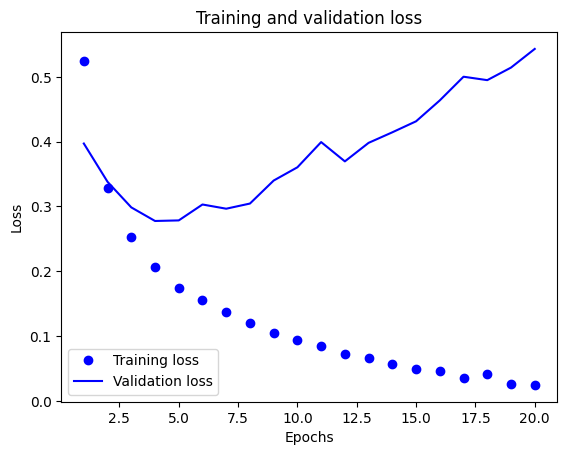

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

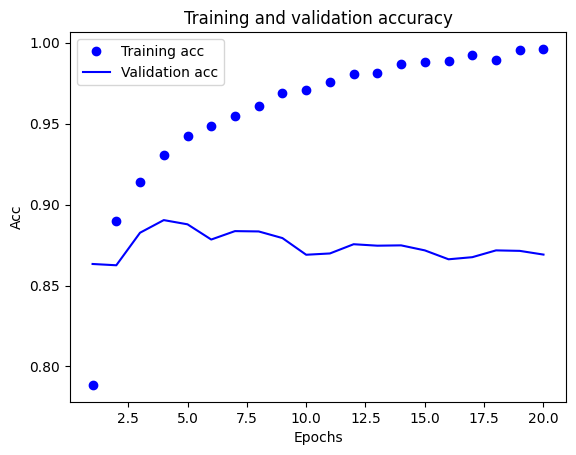

In [17]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [21]:
results = model2.evaluate(x_val,y_val)
results

313/313 [==============================] - 0s 902us/step - loss: 0.5431 - accuracy: 0.8691


[0.5431085824966431, 0.8690999746322632]

In [33]:
y_pre=model2.predict(x_val)
print(y_pre)
y_final=[]
for element in y_pre:
    if element[0] > 0.5:
        y_final.append(1)
    else:
        y_final.append(0)

print(y_final)

313/313 [==============================] - 0s 1ms/step
[[9.9998873e-01]
 [1.4375757e-04]
 [4.1223248e-05]
 ...
 [9.9997187e-01]
 [8.8655055e-03]
 [9.2034519e-04]]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [44]:
import seaborn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
def plotHeatMap(Y_test, Y_pred):
    con_mat = confusion_matrix(Y_test, Y_pred)
    # 绘图
    plt.figure(figsize=(4, 5))
    seaborn.heatmap(con_mat, annot=True, fmt='.20g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
def plot_roc_curve(Y_test, Y_pred):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    plt.plot(fpr, tpr, linewidth=2, label=None)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

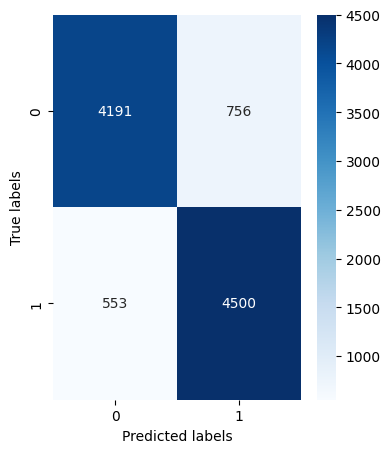

In [45]:
plotHeatMap(y_val,y_final)

In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print('Precision(精确率，预测为正常中真正正常): %.3f' % precision_score(y_val,y_final))
print('F1 Score: %.3f' % f1_score(y_val,y_final))
print('Recall(所有正常被预测的比例): %.3f' % recall_score(y_val,y_final))
print('Accuracy: %.3f' % accuracy_score(y_val,y_final))

Precision(精确率，预测为正常中真正正常): 0.856
F1 Score: 0.873
Recall(所有正常被预测的比例): 0.891
Accuracy: 0.869


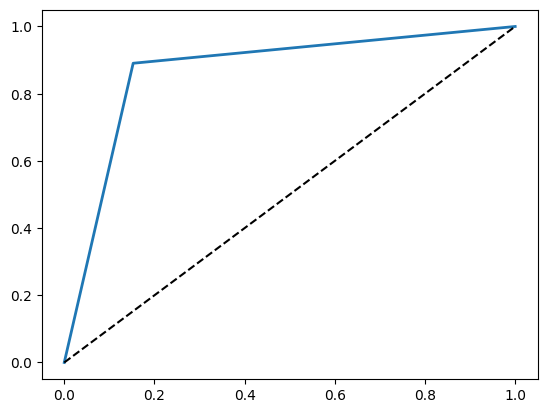

In [46]:
plot_roc_curve(y_val,y_final)

In [29]:
shuffle_index = np.random.permutation(len(x_train))
train_len=int(0.2*len(shuffle_index))
train_index=shuffle_index[:train_len]
train_index
# X_train=x_train[train_index]
# X_train

array([ 6526, 19668,  3751, ..., 21496, 18175, 19647])

In [4]:
from sklearn import svm
import numpy as np
# 1. 准备数据
data = [
  [0, 0],
  [1, 1],
  [1, 0],
  [0, 1]
]
data=np.array(data)
labels = [-1, 1, -1, 1]
labels=np.array(labels)
# 2. 训练模型
svmModel = svm.SVC(kernel='linear')
svmModel.fit(data, labels)

# 3. 预测新数据
newData = [[0, 0], [1, 0]]
predictions = svmModel.predict(newData)
print(predictions) # [-1, -1]

[-1 -1]


In [6]:
print(data.shape)
print(labels.shape)

(4, 2)
(4,)


In [1]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

preds = [0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
trues = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]

# 准确率 
## normalize=False返回做对的个数,normalize=True返回做对的占比
acc = accuracy_score(trues, preds)
acc_nums = accuracy_score(trues, preds, normalize=False)
print(acc, acc_nums) # 0.7 7

# 由于是二分类问题，所有其他参数都使用默认，只需要输入y_true和y_pred
# 精确率
p = precision_score(trues, preds)
# 召回率
r = recall_score(trues, preds)
# f1-score
f1 = f1_score(trues, preds)
print(p, r, f1) # 0.6666666666666666 0.5 0.5714285714285715

0.7 7
0.6666666666666666 0.5 0.5714285714285715


## K折交叉验证

In [ ]:
from sklearn.model_selection import KFold 

kf = KFold(n_splits=5, random_state=None) # 5折

#显示具体划分情况
for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index] 

i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = metrics.accuracy_score(y_test, pred_test)
    print('accuracy_score', score)
    i += 1
    #pred_test = model.predict(X_test)
    pred = model.predict_proba(X_test)[:, 1]
